In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed 

import numpy as np # linear algebra
import pandas as pd # data processing


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
#df1 = pd.read_csv("/kaggle/input/predicting-poverty/train_values_wJZrCmI.csv")
df1 = pd.read_csv("train_values_wJZrCmI.csv")
#df2 = pd.read_csv("/kaggle/input/predicting-poverty/train_labels.csv")
df2 = pd.read_csv("train_values_wJZrCmI.csv")


df = df1.merge(df2, on='row_id')

In [8]:
df.head()

,row_id,country_x,is_urban_x,age_x,female_x,married_x,religion_x,relationship_to_hh_head_x,education_level_x,literacy_x,...,reg_formal_nbfi_account_y,financially_included_y,active_bank_user_y,active_mm_user_y,active_formal_nbfi_user_y,active_informal_nbfi_user_y,nonreg_active_mm_user_y,num_formal_institutions_last_year_y,num_informal_institutions_last_year_y,num_financial_activities_last_year_y
0,0,C,False,18.0,True,True,P,Other,1.0,True,...,False,True,True,False,False,False,False,1,0,1
1,1,C,True,30.0,True,True,P,Other,1.0,True,...,False,True,True,False,False,False,False,1,0,0
2,2,A,False,20.0,True,True,Q,Spouse,1.0,True,...,False,False,False,False,False,False,False,0,0,0
3,3,A,False,61.0,False,True,Q,Head,0.0,False,...,False,False,False,False,False,False,False,0,0,0
4,4,D,False,26.0,True,True,X,Spouse,1.0,True,...,False,False,False,False,False,False,False,1,0,3


In [9]:
df.shape

(12600, 117)

In [10]:
df.dtypes

row_id                                     int64
country_x                                 object
is_urban_x                                  bool
age_x                                    float64
female_x                                    bool
                                          ...   
active_informal_nbfi_user_y                 bool
nonreg_active_mm_user_y                     bool
num_formal_institutions_last_year_y        int64
num_informal_institutions_last_year_y      int64
num_financial_activities_last_year_y       int64
Length: 117, dtype: object

In [11]:
df.isnull().sum()

row_id                                   0
country_x                                0
is_urban_x                               0
age_x                                    0
female_x                                 0
                                        ..
active_informal_nbfi_user_y              0
nonreg_active_mm_user_y                  0
num_formal_institutions_last_year_y      0
num_informal_institutions_last_year_y    0
num_financial_activities_last_year_y     0
Length: 117, dtype: int64

In [23]:
df.drop(['bank_interest_rate', 'mm_interest_rate', 'mfi_interest_rate', 'other_fsp_interest_rate'], axis = 1) 

KeyError: "['bank_interest_rate', 'mm_interest_rate', 'mfi_interest_rate', 'other_fsp_interest_rate'] not found in axis"

In [14]:
def age_grouping(data):
    age_condition = [
    (data['age'] < 30 ),
    (data['age'] >= 30) & (data['age'] < 45),
    (data['age'] >= 45) & (data['age'] < 60),
    (data['age'] >= 60)
    ]
    age_bins = ['< 30', '30 to 44', '45 to 60', '> 60']
    data['age_group'] = np.select(age_condition, age_bins)

age_grouping(df)

KeyError: 'age'

In [15]:
def count_unique(df, cols):
    for col in cols:
        print(df[col].value_counts())

categ_cols = ['age_group','country','is_urban','female','married','religion','relationship_to_hh_head',
 'education_level','literacy','can_add','can_divide','can_calc_percents','can_calc_compounding',
 'employed_last_year','employment_category_last_year','employment_type_last_year',
 'income_ag_livestock_last_year','income_friends_family_last_year','income_government_last_year',
 'income_own_business_last_year','income_private_sector_last_year','income_public_sector_last_year',
 'borrowing_recency','formal_savings','informal_savings','cash_property_savings',
 'has_insurance','has_investment','borrowed_for_emergency_last_year','borrowed_for_daily_expenses_last_year',
 'borrowed_for_home_or_biz_last_year','phone_technology','can_call','can_text','can_use_internet',
 'can_make_transaction','phone_ownership','advanced_phone_use','reg_bank_acct',
 'reg_mm_acct','reg_formal_nbfi_account','financially_included','active_bank_user',
 'active_mm_user','active_formal_nbfi_user','active_informal_nbfi_user','nonreg_active_mm_user', 'share_hh_income_provided', 
'num_times_borrowed_last_year','num_shocks_last_year','num_formal_institutions_last_year',
            'num_informal_institutions_last_year']

count_unique(df, categ_cols)

KeyError: 'age_group'

In [27]:
for column in df[['education_level', 'share_hh_income_provided']]:
    mode = df[column].mode()
    df[column] = df[column].fillna(mode)

KeyError: "None of [Index(['education_level', 'share_hh_income_provided'], dtype='object')] are in the [columns]"

In [26]:
def df_converted(df, convert_from, convert_to):
    cols = df.select_dtypes(include=[convert_from]).columns
    for col in cols:
        df[col] = df[col].values.astype(convert_to)
    return df

df = df_converted(df, np.bool, np.int64)

C:\Users\Arjun\AppData\Local\Temp\ipykernel_12260\2721598814.py:7: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  df = df_converted(df, np.bool, np.int64)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [25]:
df['Poverty_conditional'] = [1 if poverty_probability>=0.5 
                             else 0 for poverty_probability in df['poverty_probability']] 

KeyError: 'poverty_probability'

In [24]:
df['is_urban'].value_counts().plot(kind='bar')

KeyError: 'is_urban'

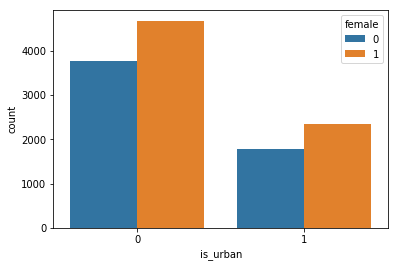

In [ ]:
ax = sns.countplot(x="is_urban", hue="female", data=df)

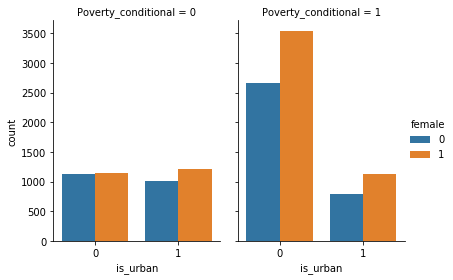

In [ ]:
g = sns.catplot(x="is_urban", hue="female", col="Poverty_conditional",
                data = df, kind="count",
                height=4, aspect=.7)

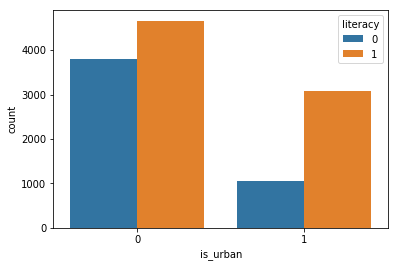

In [ ]:
ax = sns.countplot(x="is_urban", hue="literacy", data=df)

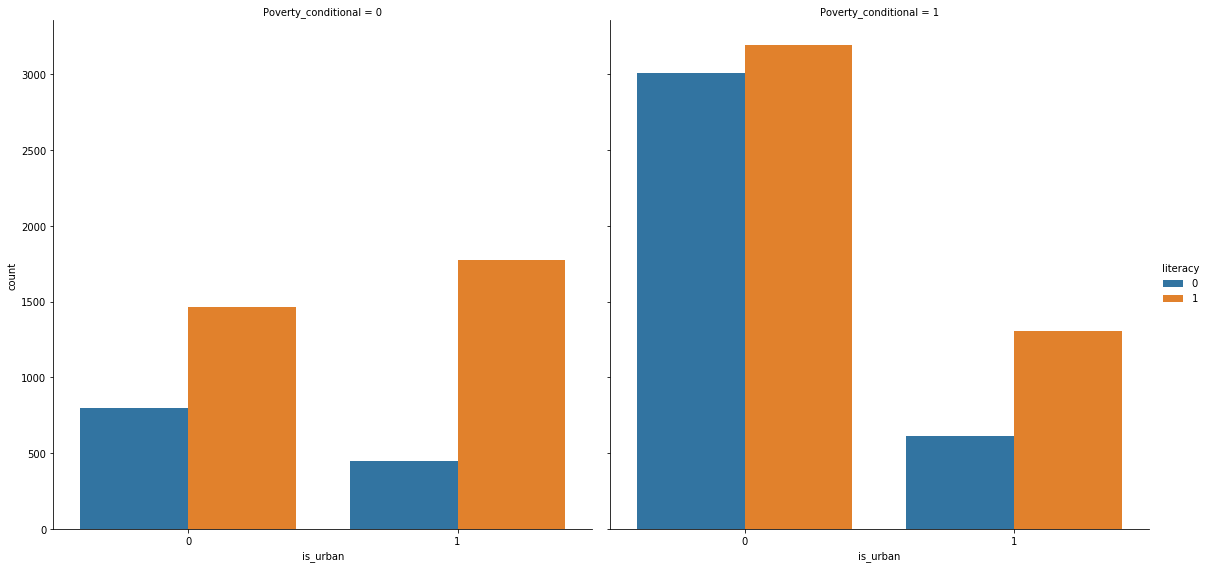

In [ ]:
g = sns.catplot(x="is_urban", hue="literacy", col="Poverty_conditional",
                data = df, kind="count",
                height=8, aspect=1)

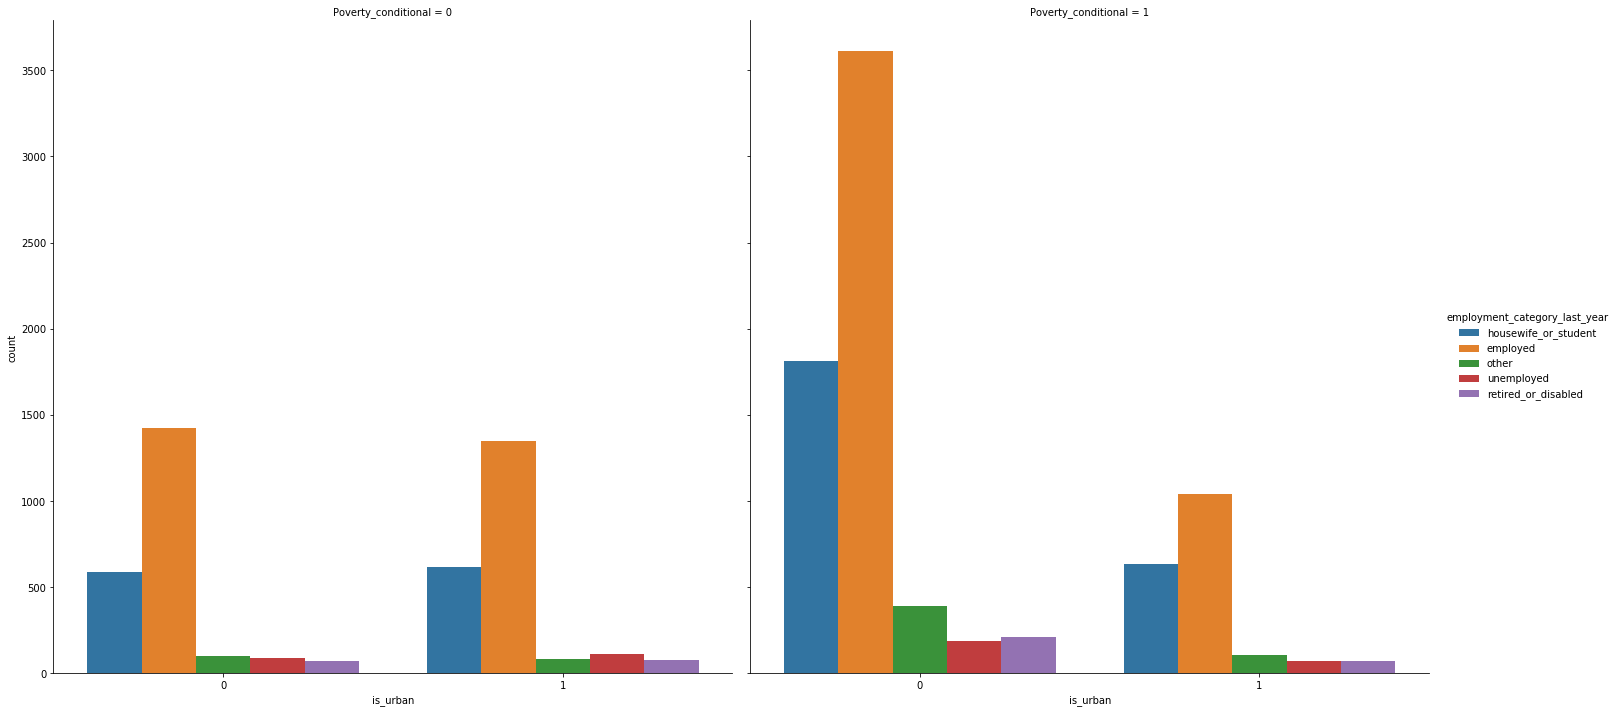

In [ ]:
g = sns.catplot(x="is_urban", hue="employment_category_last_year", col="Poverty_conditional",
                data = df, kind="count",
                height=10, aspect=1)

In [ ]:
def f(row):
    if row['formal_savings'] == 1:
        sav = 1
    elif row['informal_savings'] == 1:
        sav = 1
    else:
        sav = 0
    return sav
    
df['sav'] = df.apply(f, axis=1)

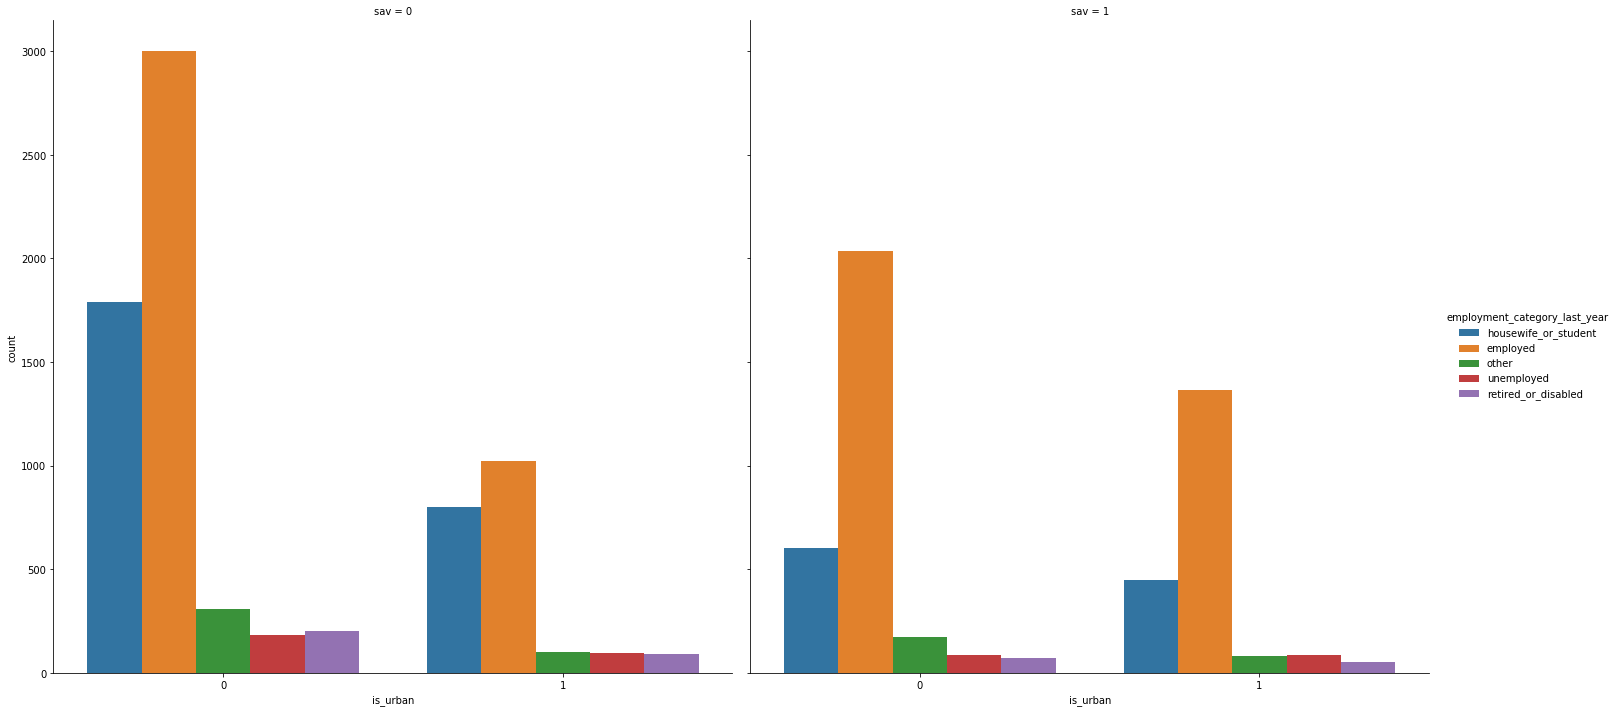

In [ ]:
g = sns.catplot(x="is_urban", hue="employment_category_last_year", col="sav",
                data = df, kind="count",
                height=10, aspect=1)

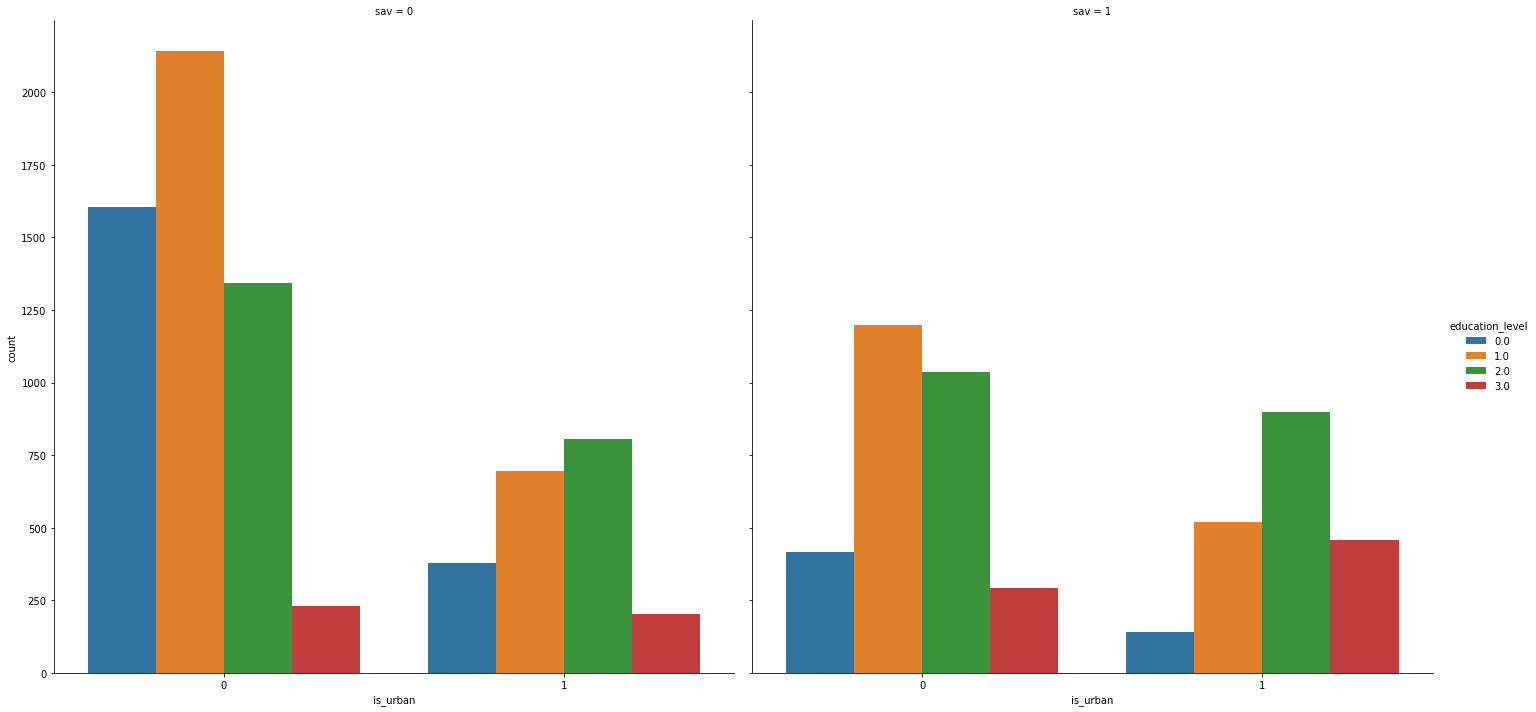

In [ ]:
g = sns.catplot(x="is_urban", hue="education_level", col="sav",
                data = df, kind="count",
                height=10, aspect=1)

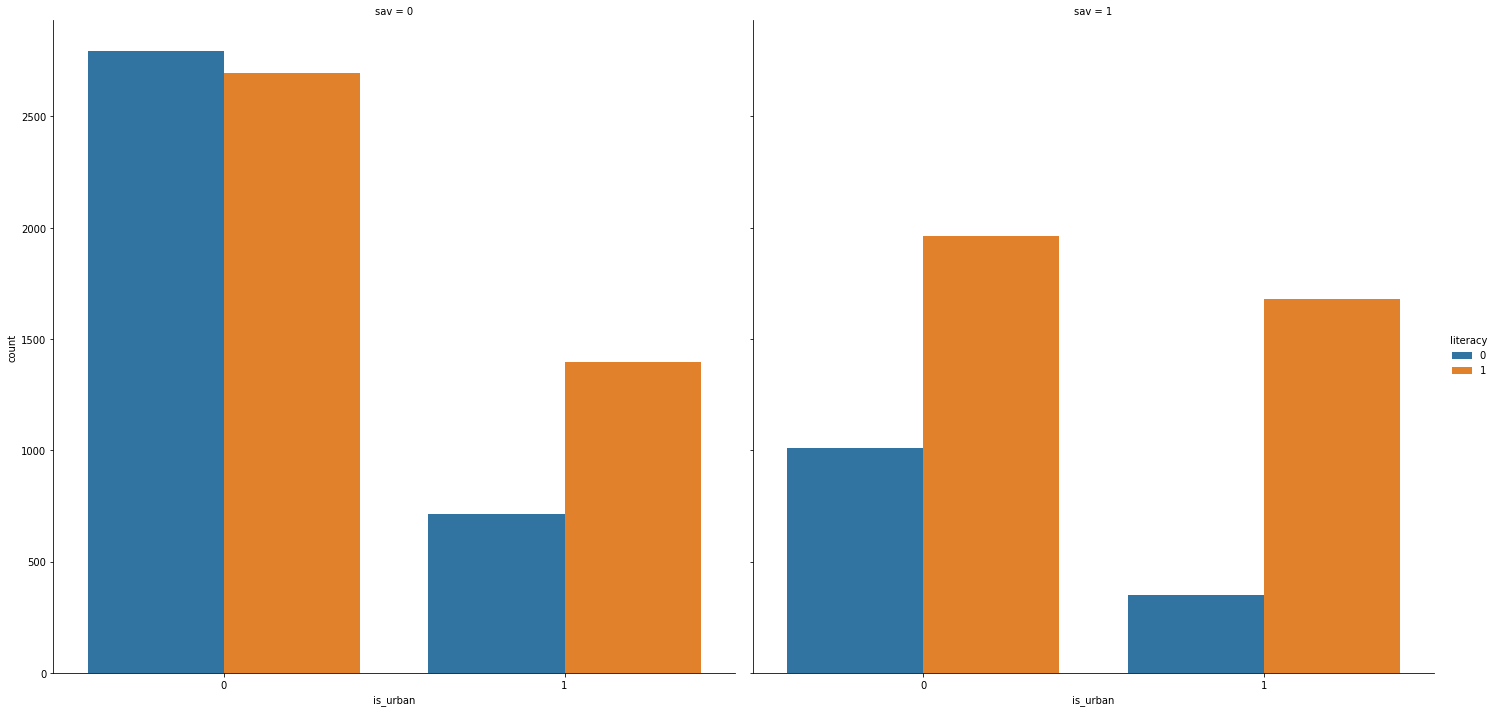

In [ ]:
g = sns.catplot(x="is_urban", hue="literacy", col="sav",
                data = df, kind="count",
                height=10, aspect=1)

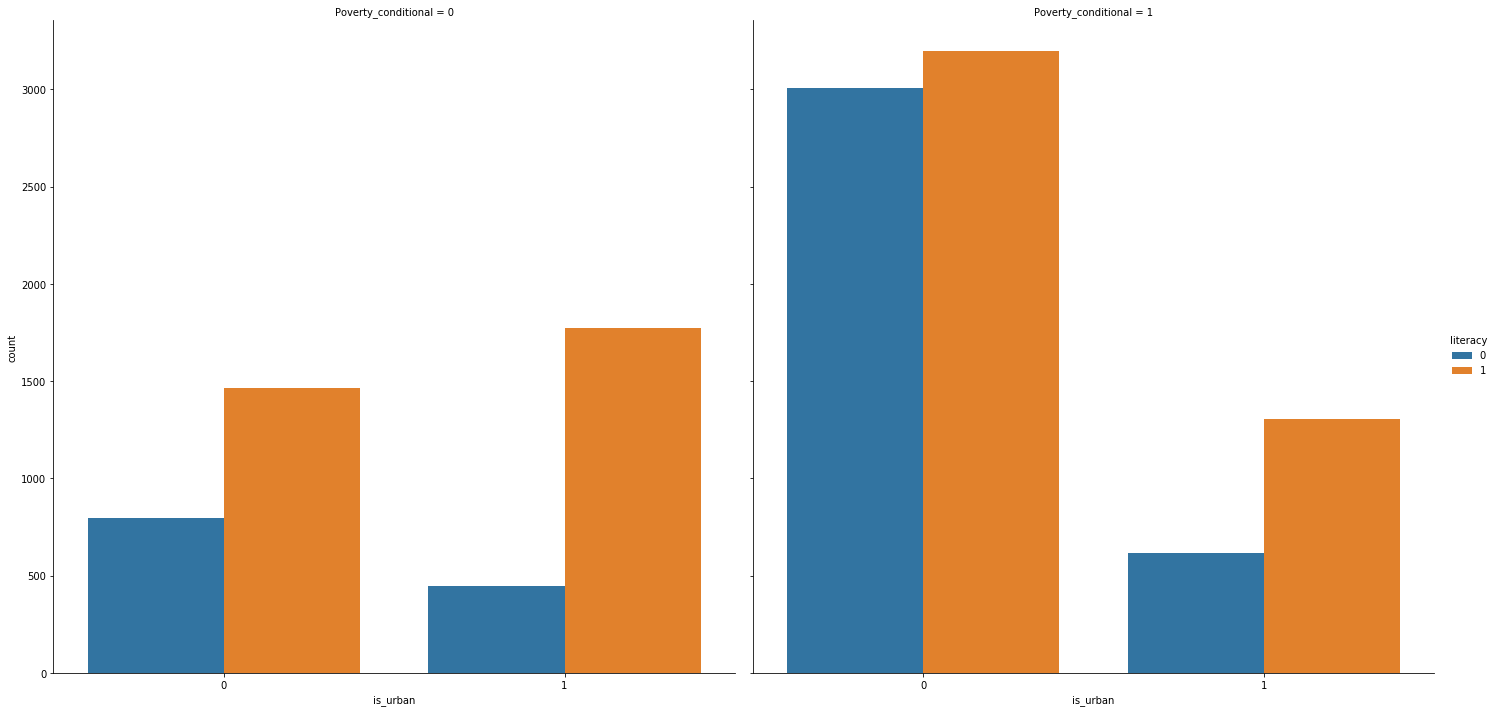

In [ ]:
g = sns.catplot(x="is_urban", hue="literacy", col="Poverty_conditional",
                data = df, kind="count",
                height=10, aspect=1)

In [ ]:
def d(row):
    if row['borrowed_for_emergency_last_year'] == 1:
        borrowed = 1
    elif row['borrowed_for_daily_expenses_last_year'] == 1:
        borrowed = 1
    elif row['borrowed_for_home_or_biz_last_year'] == 1:
        borrowed = 1
    else:
        borrowed = 0
    return borrowed

df['borrowed'] = df.apply(d, axis=1)
df['borrowed'].value_counts()

0    8587
1    4013
Name: borrowed, dtype: int64

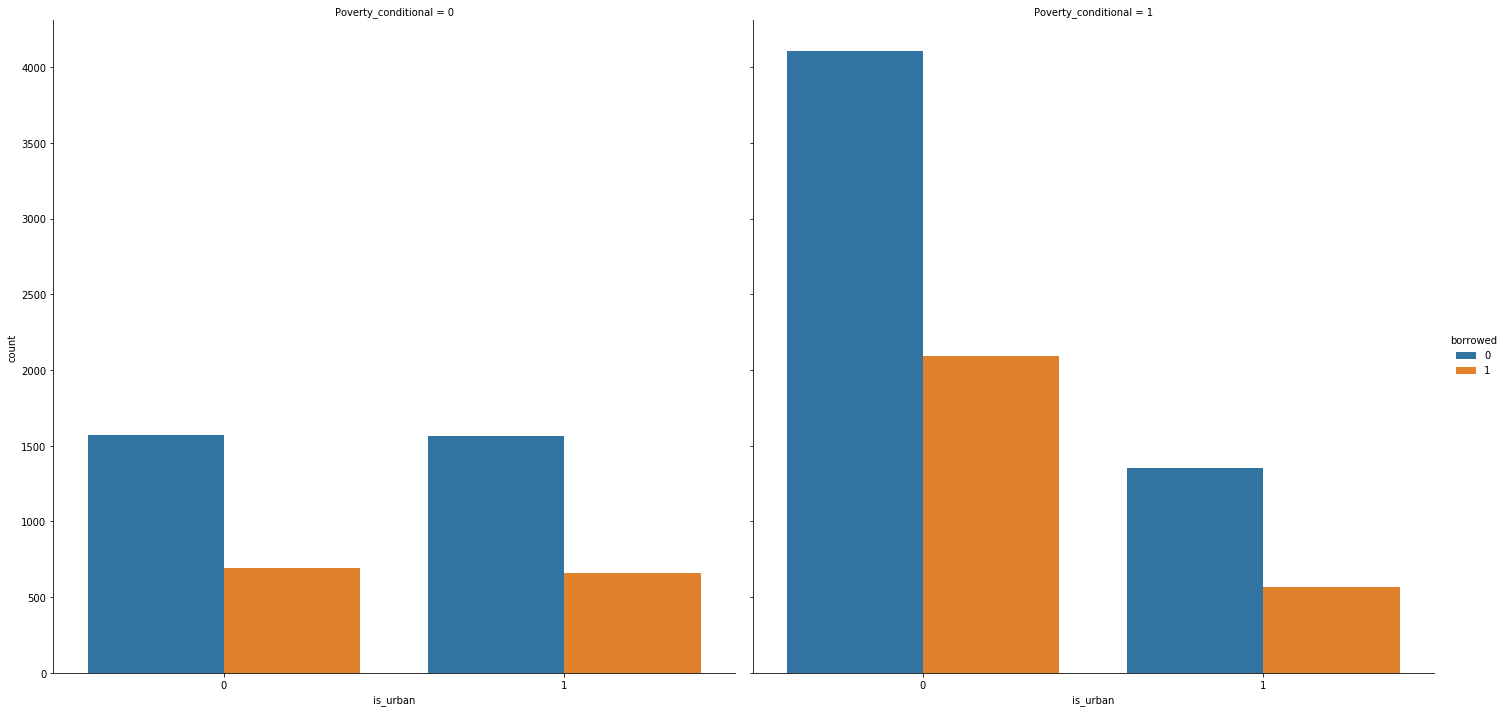

In [ ]:
g = sns.catplot(x="is_urban", hue="borrowed", col="Poverty_conditional",
                data = df, kind="count",
                height=10, aspect=1)

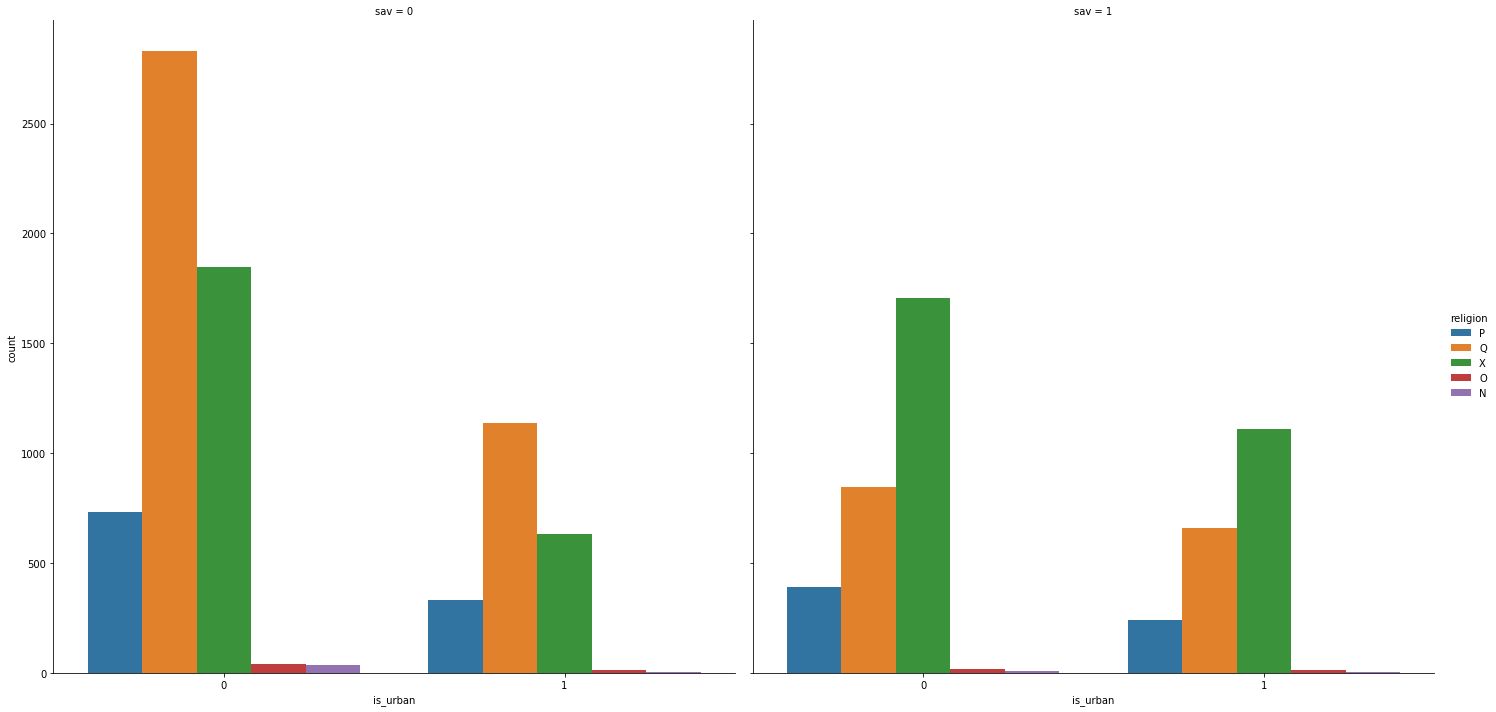

In [ ]:
g = sns.catplot(x="is_urban", hue="religion", col="sav",
                data = df, kind="count",
                height=10, aspect=1)

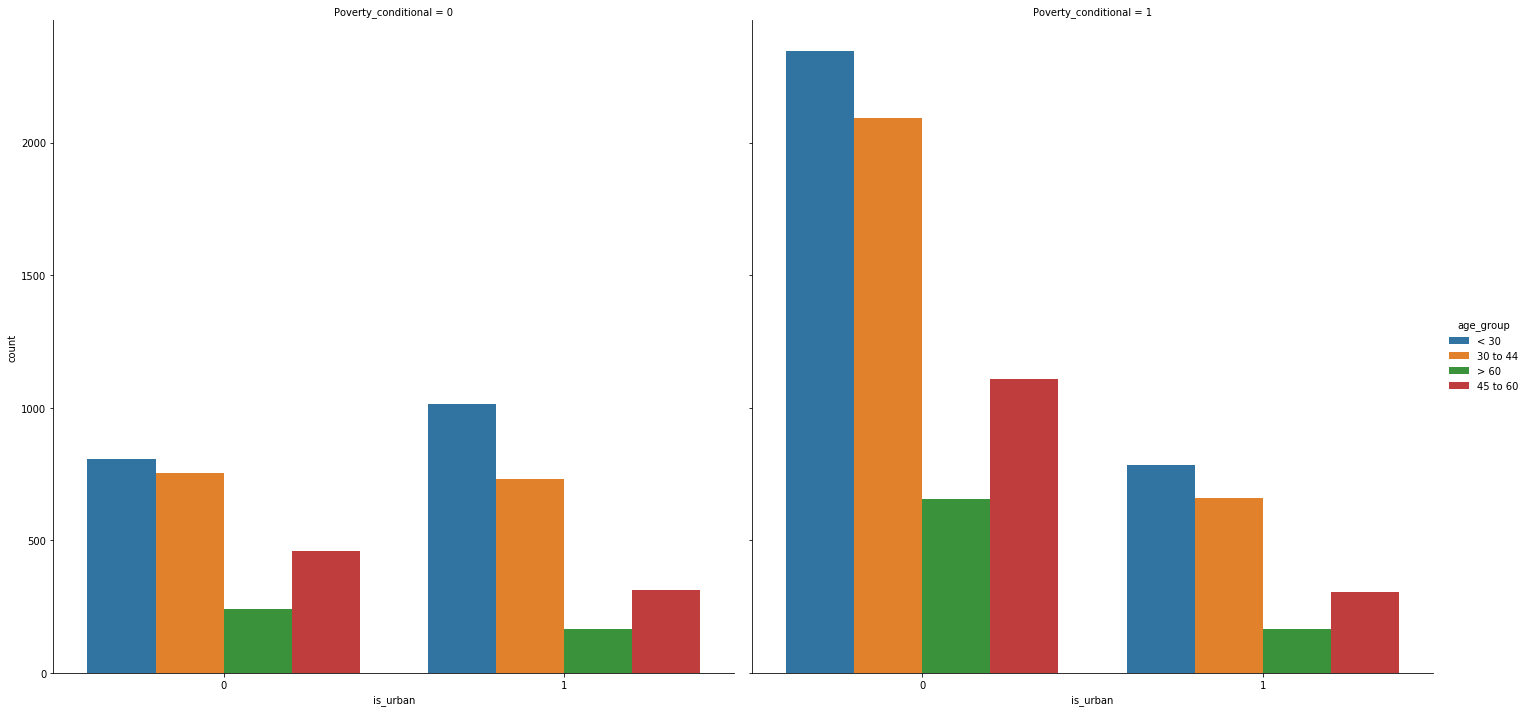

In [ ]:
g = sns.catplot(x="is_urban", hue="age_group", col="Poverty_conditional",
                data = df, kind="count",
                height=10, aspect=1)

In [ ]:
from statsmodels.formula.api import ols

model = ols('poverty_probability ~ age + C(female)', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     poverty_probability   R-squared:                       0.003
Model:                             OLS   Adj. R-squared:                  0.003
Method:                  Least Squares   F-statistic:                     21.96
Date:                 Thu, 06 Feb 2020   Prob (F-statistic):           3.03e-10
Time:                         06:58:03   Log-Likelihood:                -2322.9
No. Observations:                12600   AIC:                             4652.
Df Residuals:                    12597   BIC:                             4674.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5847      0.007     78.158      0.000       0.570       0.599
C(female)[T.1]     0.0344      0.005      6.577      0.000       0.024       0.045
age                0.0002      0.000      1.184      0.236      -0.000       0.001
==============================================================================
Omnibus:                     2677.598   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              906.757
Skew:                          -0.451   Prob(JB):                    1.26e-197
Kurtosis:                       2.044   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

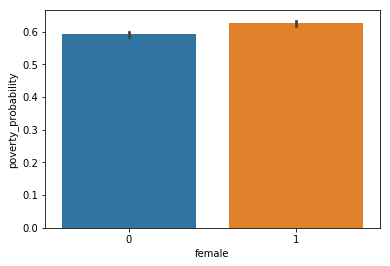

In [ ]:
from numpy import mean
g = sns.barplot(x="female", y="poverty_probability", data = df, estimator=mean)

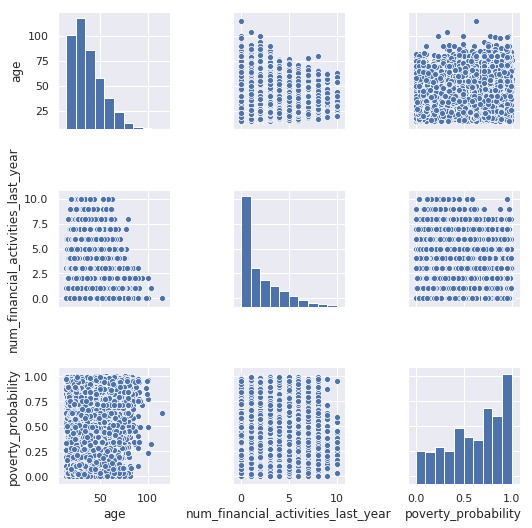

In [ ]:
num_cols = ['age', 'num_financial_activities_last_year', 'poverty_probability'] 

sns.set(style="darkgrid")
sns.pairplot(df[num_cols])

corrs = df[num_cols].corr()

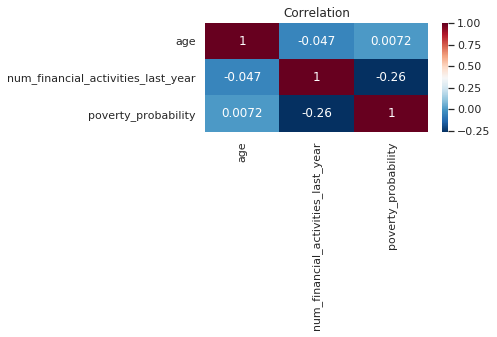

In [ ]:
plt.figure(figsize=(5,2))
sns.heatmap(df[num_cols].corr(),annot=True,cmap='RdBu_r')
plt.title("Correlation")
plt.show()

In [ ]:
export_csv = df.to_csv('export_df.csv', index = None, header=True)